### Practical Part

#### 2a)

The MSE for the PCA is 2.096461770240408e-31
The MSE for the ICA is 4.745007471227019e-32


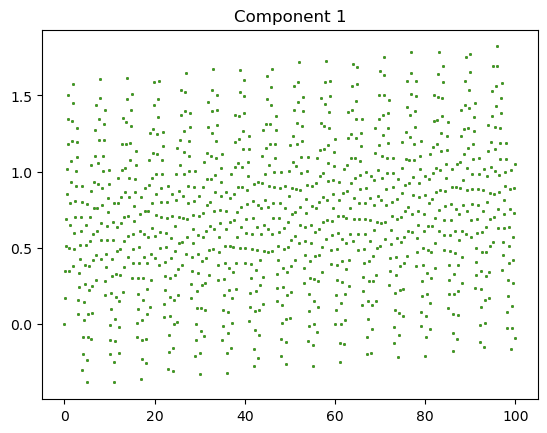

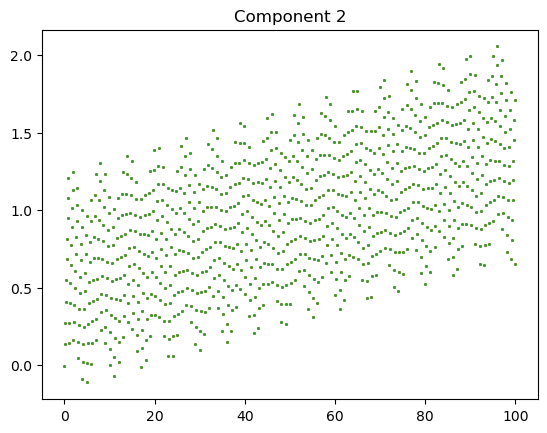

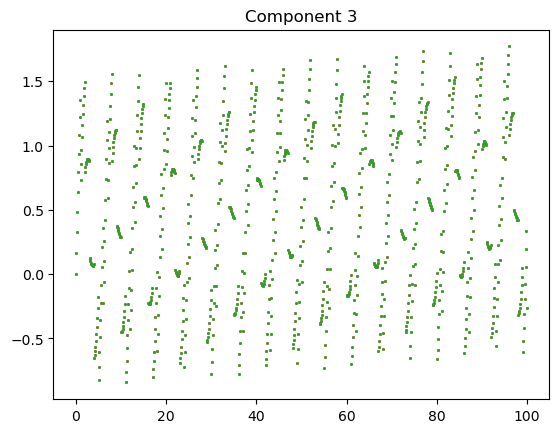

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
import warnings
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# Generate three time series

def get_noise(t):
    return np.random.normal(0, 1, t)

t = np.linspace(0, 100, 1000)
func_1 = np.sin(t) + 0.001 * get_noise(len(t))
func_2 = 2*(t-np.floor(t)) + 0.002 * get_noise(len(t))
func_3 = 0.01 * t + 0.001 * get_noise(len(t))

# Generate Matrix

func = np.vstack([func_1, func_2, func_3])

A = np.random.rand(3, 3)

transformed_vals = np.dot(A, func)

# print(transformed_vals.shape)

# Perform PCA and ICA 

pca = PCA(n_components=3, random_state=69)

result_1 = pca.fit_transform(transformed_vals.T)

ica = FastICA(n_components=3, random_state=69)

result_2 = ica.fit_transform(transformed_vals.T)

# Plotting the results

pca_back = pca.inverse_transform(result_1)
ica_back = ica.inverse_transform(result_2)

mse_pca = mean_squared_error(transformed_vals.T, pca_back)
mse_ica = mean_squared_error(transformed_vals.T, ica_back)

print(f"The MSE for the PCA is {mse_pca}")
print(f"The MSE for the ICA is {mse_ica}")

for i in range(3):
    plt.scatter(t, transformed_vals[i], s=1, label="Input Data")
    plt.scatter(t, pca_back[:, i], label="PCA", s=1)
    plt.scatter(t, ica_back[:, i], label="ICA", s=1)
    plt.title(f"Component {i+1}")
    plt.show()

#### 2b)

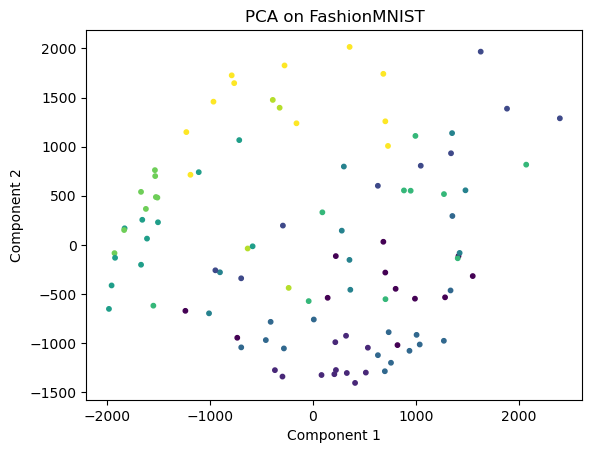

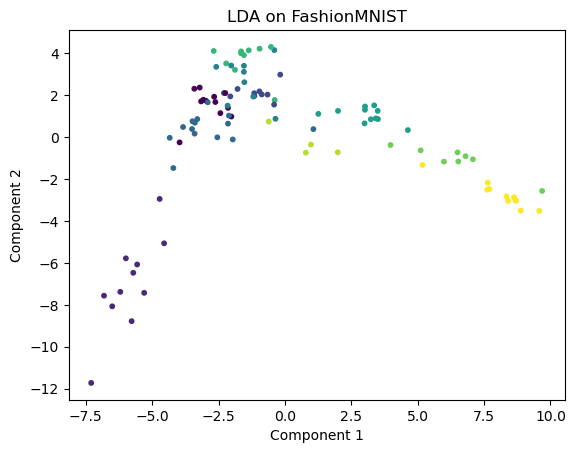

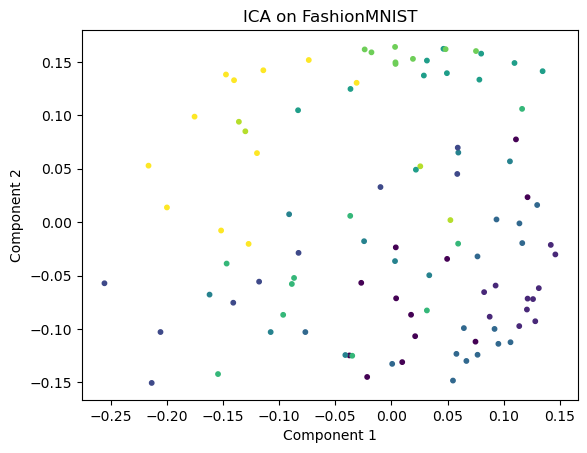

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml
from sklearn.metrics import explained_variance_score

# Get FashionMNIST data

fashion_mnist = fetch_openml('Fashion-MNIST')
X, y = fashion_mnist['data'], fashion_mnist['target']

X = X[:100]
y = y[:100]

# Perform PCA, LDA and ICA

pca = PCA(n_components=2, random_state=69)
X_pca = pca.fit_transform(X)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

ica = FastICA(n_components=2, random_state=69)
X_ica = ica.fit_transform(X)

# Plot the results

models = {"PCA": X_pca, "LDA": X_lda, "ICA": X_ica}

for key, value in models.items():
    plt.scatter(value[:, 0], value[:, 1], c=y.astype(int), s=10)
    plt.title(f'{key} on FashionMNIST')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()
